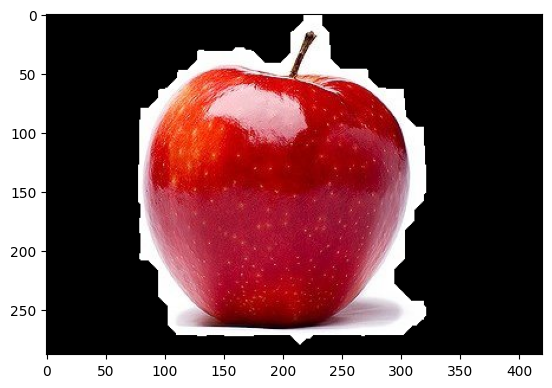

In [8]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img_path = "./data/img_app.png"
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

rect = (0, 0, 399, 1000)

mask = np.zeros(img.shape[:2], np.uint8)
# print(mask)

bgModel = np.zeros((1, 65), np.float64)
fgModel = np.zeros((1, 65), np.float64)

cv2.grabCut(img, mask, rect,bgModel, fgModel, 5, cv2.GC_INIT_WITH_RECT)

mask2 = np.where((mask==2) | (mask==0), 0, 1).astype('uint8')

image_rgb_nobg = img*mask2[:,:,np.newaxis]

plt.imshow(image_rgb_nobg)
plt.show()

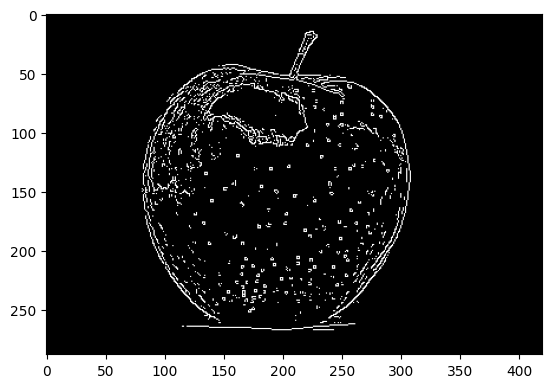

In [9]:
# border line
median_intensity = np.median(img)

lower_th = int(max(0, (1.0 - 0.33)*median_intensity))
upper_th = int(max(0, (1.0 - 0.33)*median_intensity))

img_canny = cv2.Canny(img, lower_th, upper_th)

plt.imshow(img_canny, 'gray')
plt.show()

In [17]:
img = cv2.imread("./data/box.png")
img_gray = cv2.imread("./data/box.png", cv2.IMREAD_GRAYSCALE)
img_gray = np.float32(img_gray)


#detecting border line parameters setting
block_size = 4
aperture = 29
free_parameter = 0.04

detector_res = cv2.cornerHarris(
    img_gray,
    block_size,
    aperture,
    free_parameter
)

detector_res = cv2.dilate(detector_res, None) #to highlight borderline marking

threshold = 0.01
for i in range(detector_res.shape[0]):
    for j in range(detector_res.shape[1]):
        if detector_res[i, j] > threshold*detector_res.max():
            # print(threshold * detector_res.max())
            cv2.circle(img, [j, i],radius=5, color=(0, 0,255), thickness=-1)


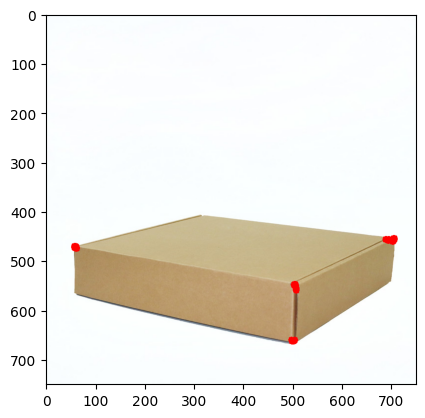

In [18]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.show()